In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wavelen = 1
k = 2*np.pi/wavelen
n_ula = 32
snr = 10
n_ang = 128
ang = np.linspace(0, np.pi, n_ang)
elements = np.arange(n_ula)
steering_vec = np.exp(1.0j * k * elements * np.cos(ang[:, np.newaxis]))  # n_ang, n_ula
noise = 1/np.sqrt(n_ula) * (np.random.randn(n_ula) + 1.0j * np.random.randn(n_ula))

source = snr * np.exp(1.0j * np.pi/4)
sig = steering_vec + noise
print(sig.shape)

In [ ]:
cov = 1/n_ula * np.einsum('au, ak -> auk', sig, np.conj(sig))

print(cov.shape)

In [ ]:
P = np.zeros(n_ang, dtype=np.complex128)
for ii in range(n_ang):
    a = steering_vec[ii, :]
    R_a = np.matmul(cov[ii, :, :], a)
    print
    P[ii] = np.matmul(np.conj(steering_vec[ii, :]), R_a)
print(P)

In [ ]:
plt.figure(num=0, clear=True)
plt.plot(ang, np.abs(P))

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5]


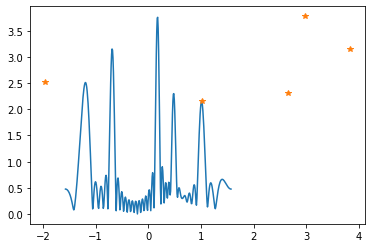

In [8]:
def array_response_vector(array,theta):
    N = array.shape
    v = np.exp(1j*2*np.pi*array*np.sin(theta))
    return v/np.sqrt(N)

lamda = 1 # wavelength
kappa = np.pi/lamda # wave number
n_source = 5  # number of sources
n_ula = 32  # number of ULA elements 
snr = 10 # signal to noise ratio

array = np.linspace(0,(n_ula-1)/2,n_ula)
print(array)

doas = np.pi*np.random.randn(n_source)   # random source directions
noise = 1/np.sqrt(2) * (np.random.randn(n_source) + 1.0j * np.random.randn(n_source))
Alphas = np.random.randn(n_source) + np.random.randn(n_source)*1j # random source powers
Alphas = np.sqrt(1/2)*Alphas
sig_snrs = np.ones(n_source)
sig = sig_snrs*doas + noise
#print(Thetas)
#print(Alphas)

h = np.zeros(n_ula)
for i in range(n_source):
    h = h + sig[i]*array_response_vector(array,doas[i])

Angles = np.linspace(-np.pi/2,np.pi/2,360)
numAngles = Angles.size

power_estimate = np.zeros(numAngles)
for j in range(numAngles):
    av = array_response_vector(array,Angles[j])
    power_estimate[j] = np.abs(np.inner(h,av.conj()))

powers = np.zeros(n_source)
for j in range(n_source):
    av = array_response_vector(array,doas[j])
    powers[j] = np.abs(np.inner(h,av.conj()))

plt.figure(num=0, clear=True)
plt.plot(Angles, np.abs(power_estimate))
plt.plot(doas,powers,'*')